In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [6]:
# Información general del dataset
print(data.info())
# Resumen estadístico
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

C:\Users\diego\AppData\Local\Temp\ipykernel_8032\538392873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


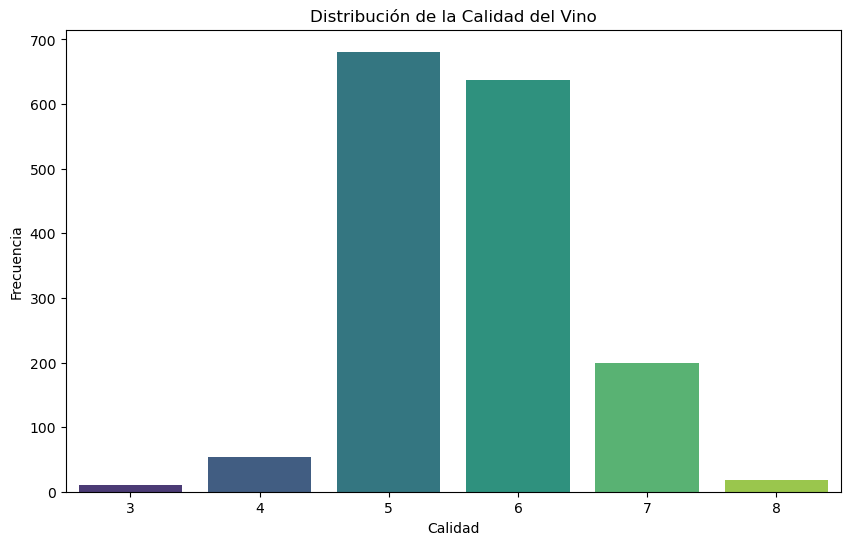

In [7]:
# Histograma de la calidad
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

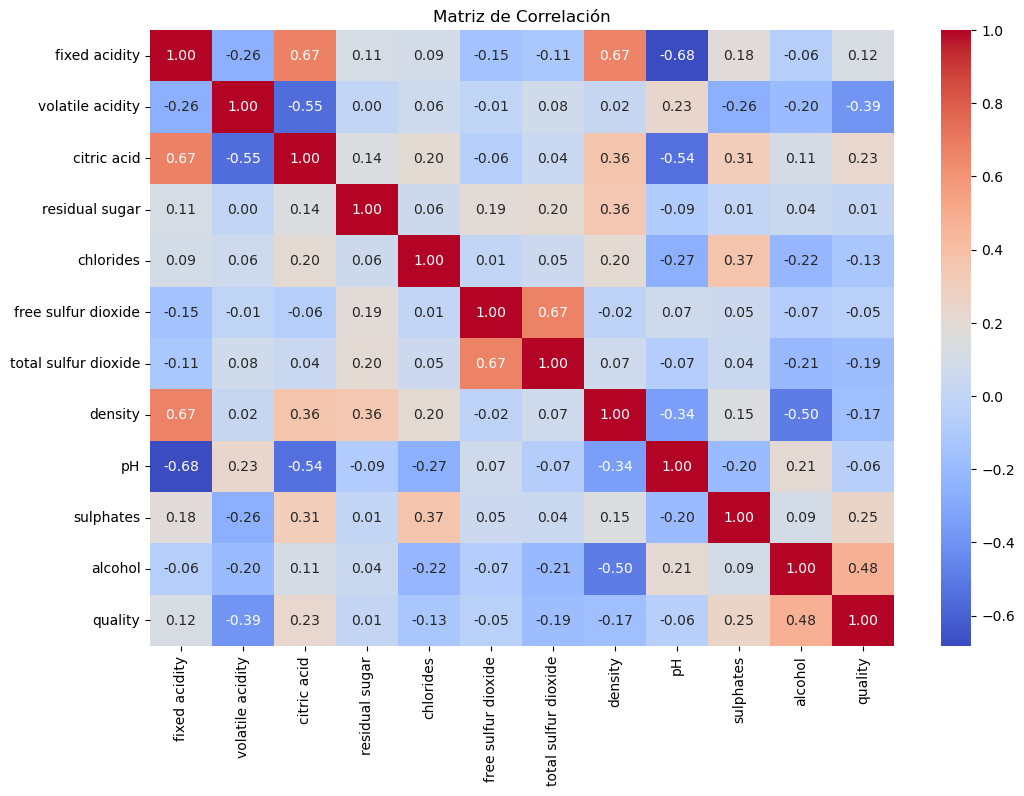

In [8]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

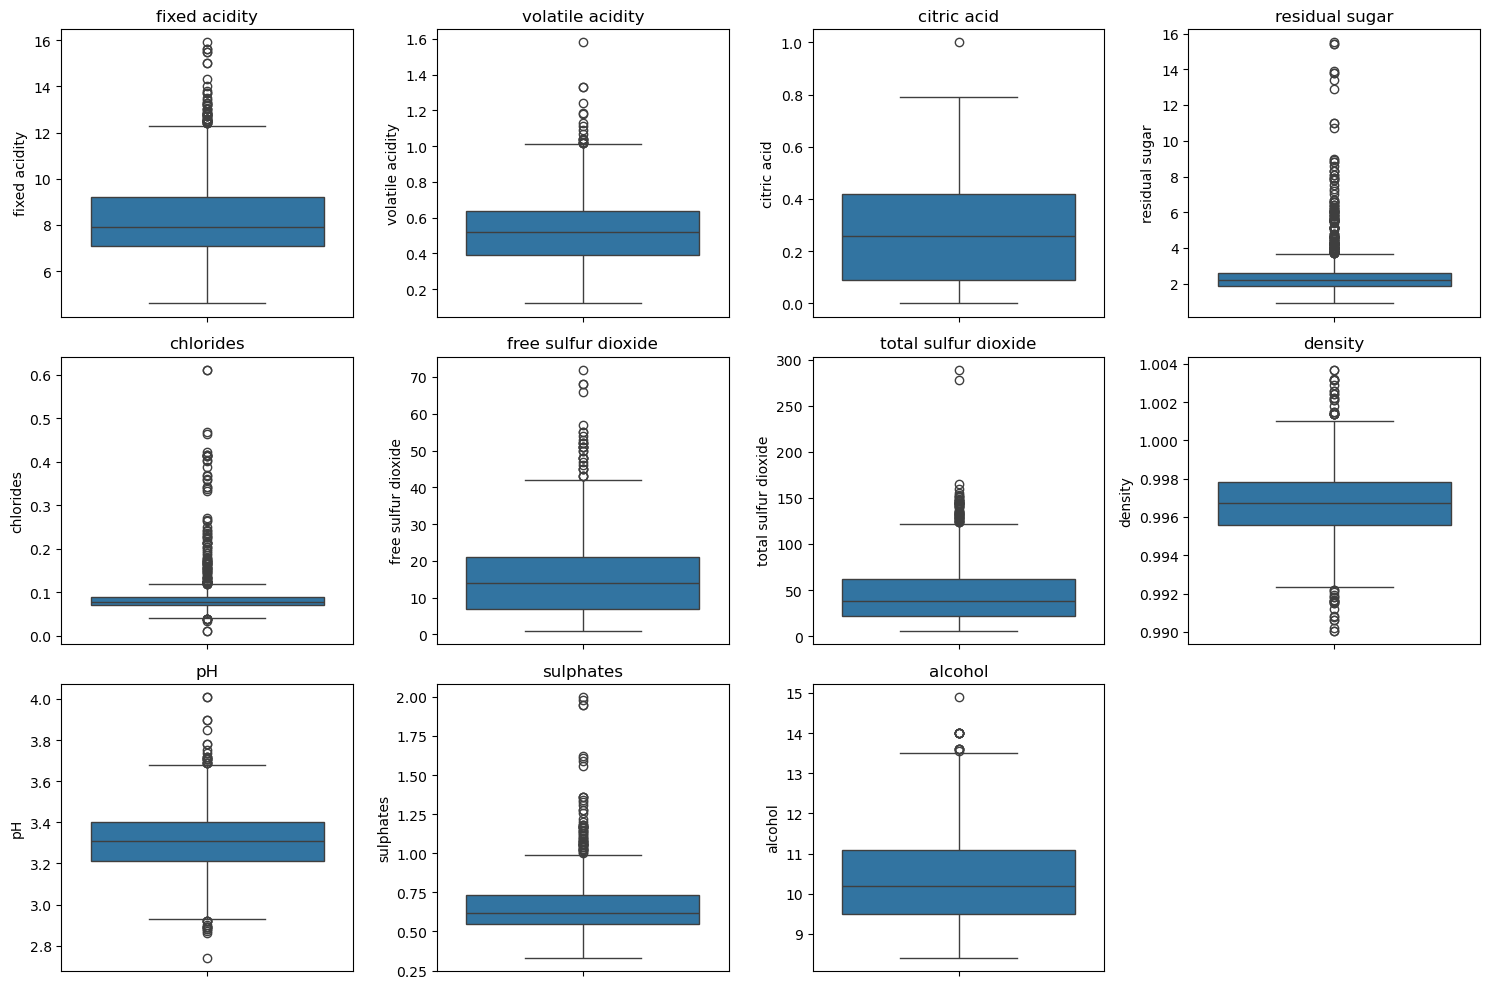

In [9]:
# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):  # Excluimos la columna de calidad
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

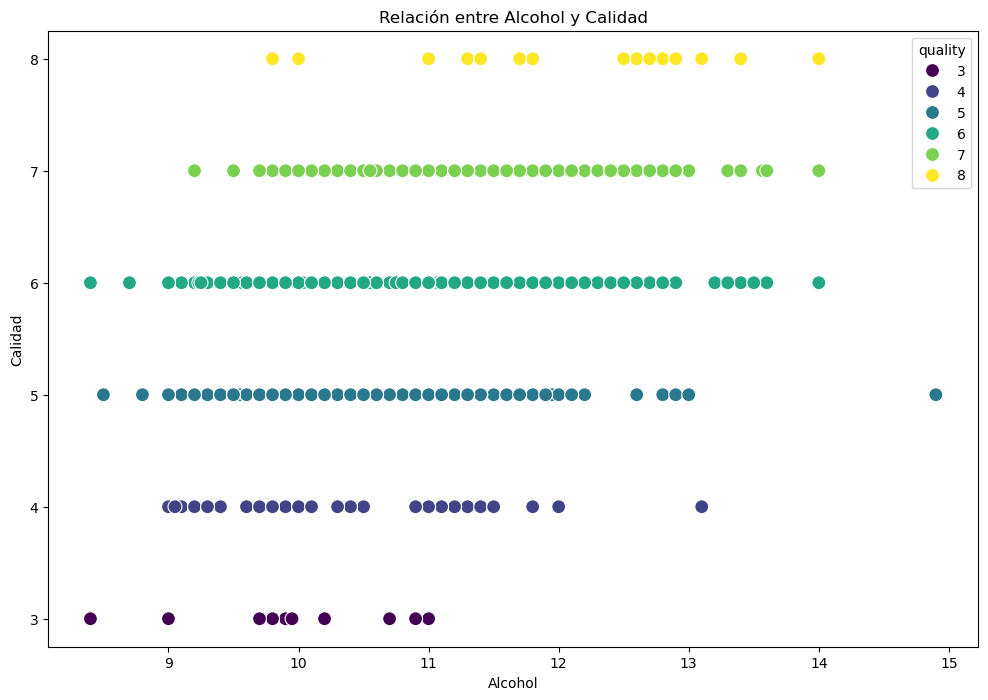

In [10]:
# Gráficos de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(x='alcohol', y='quality', data=data, hue='quality', palette='viridis', s=100)
plt.title('Relación entre Alcohol y Calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

In [11]:
# Calcular el IQR y límites para cada columna numérica
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Limites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [12]:
# Crear un booleano que indique si los valores están dentro de los límites
is_outlier = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Contar valores atípicos
num_outliers = is_outlier.sum()
print(f"Número de valores atípicos: {num_outliers}")

Número de valores atípicos: 420


In [13]:
# Eliminar los valores atípicos
data_cleaned = data[~is_outlier].reset_index(drop=True)

# Mostrar el nuevo tamaño del dataset
print(f"Tamaño del dataset después de eliminar valores atípicos: {data_cleaned.shape}")

Tamaño del dataset después de eliminar valores atípicos: (1179, 12)


C:\Users\diego\AppData\Local\Temp\ipykernel_8032\3653607448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data_cleaned, palette='viridis')


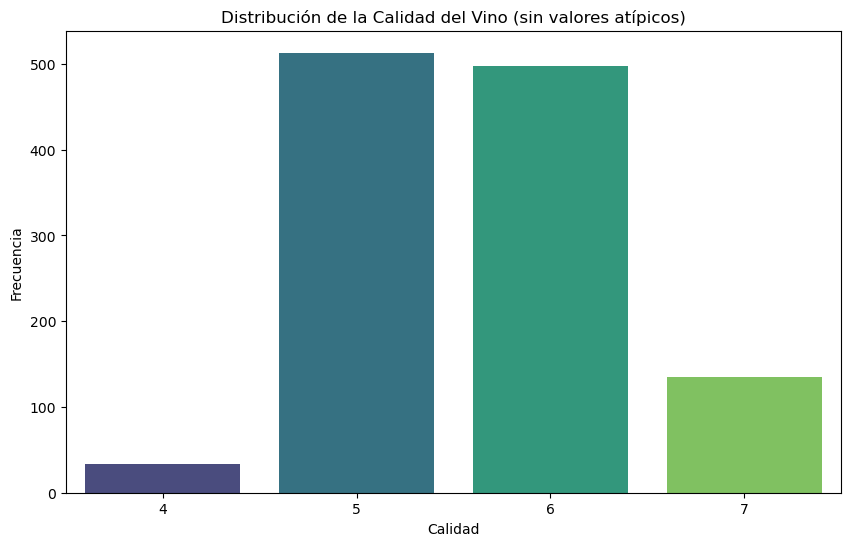

In [14]:
# Histograma de la calidad después de la limpieza
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data_cleaned, palette='viridis')
plt.title('Distribución de la Calidad del Vino (sin valores atípicos)')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
# Comprobar valores faltantes
missing_values = data_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [18]:
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = data_cleaned.drop('quality', axis=1)  # Características
y = data_cleaned['quality']  # Variable objetivo

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fixed acidity           0.113422
volatile acidity       -0.346962
citric acid             0.212133
residual sugar          0.007934
chlorides              -0.190869
free sulfur dioxide    -0.003609
total sulfur dioxide   -0.203374
density                -0.215375
pH                     -0.060288
sulphates               0.413533
alcohol                 0.492551
Name: quality, dtype: float64


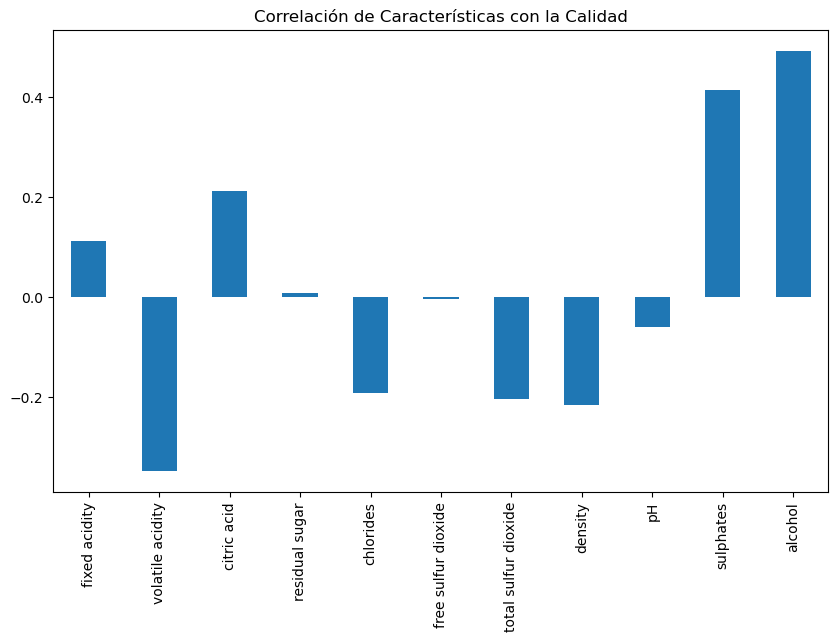

In [19]:
# Calcular la correlación con la variable objetivo
correlation = data_cleaned.corr()['quality'].drop('quality')
print(correlation)

# Visualizar la correlación
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', title='Correlación de Características con la Calidad')
plt.show()

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# Seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X_scaled, y)

# Obtener las características seleccionadas
selected_features = selector.get_support(indices=True)
print("Características seleccionadas:", X.columns[selected_features])

Características seleccionadas: Index(['volatile acidity', 'citric acid', 'density', 'sulphates', 'alcohol'], dtype='object')


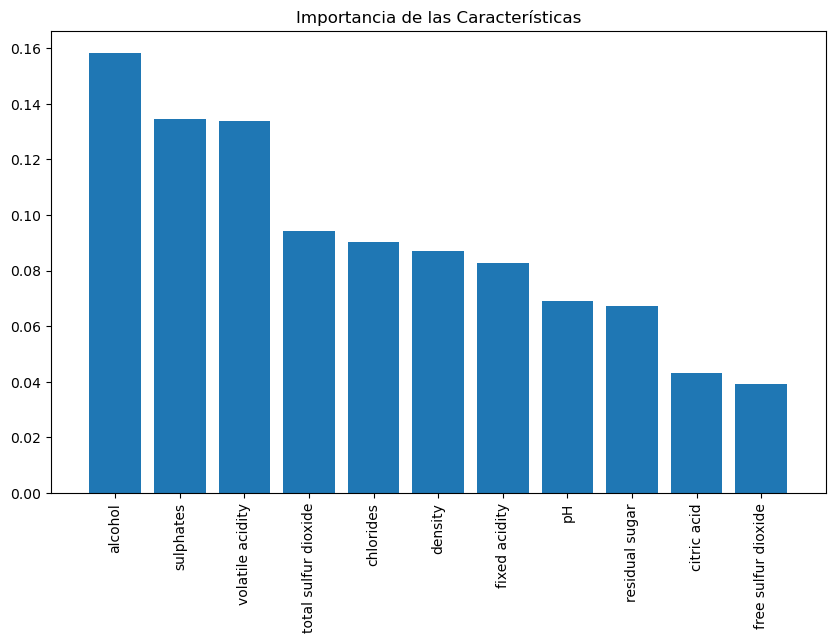

In [23]:
# Entrenar un árbol de decisiones
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Importancia de las características
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar las características (X) y la variable objetivo (y)
X = data_cleaned.drop('quality', axis=1)  # Características
y = data_cleaned['quality']  # Variable objetivo

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (943, 11)
Tamaño de X_test: (236, 11)
Tamaño de y_train: (943,)
Tamaño de y_test: (236,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador
dt_classifier = DecisionTreeClassifier(random_state=42)

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Entrenar el modelo utilizando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Mejores hiperparámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


Precisión: 0.6695
Precisión (weighted): 0.6496
Recall (weighted): 0.6695
F1-Score (weighted): 0.6586

Informe de Clasificación:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.75      0.71       102
           6       0.68      0.67      0.67        99
           7       0.67      0.62      0.64        26

    accuracy                           0.67       236
   macro avg       0.50      0.51      0.51       236
weighted avg       0.65      0.67      0.66       236



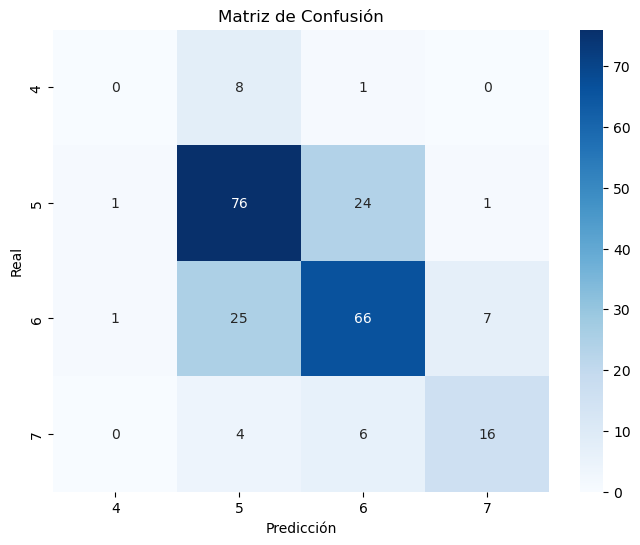

In [27]:
# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test)

# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print(f"Precisión: {accuracy:.4f}")
print(f"Precisión (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

# Informe de clasificación
print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

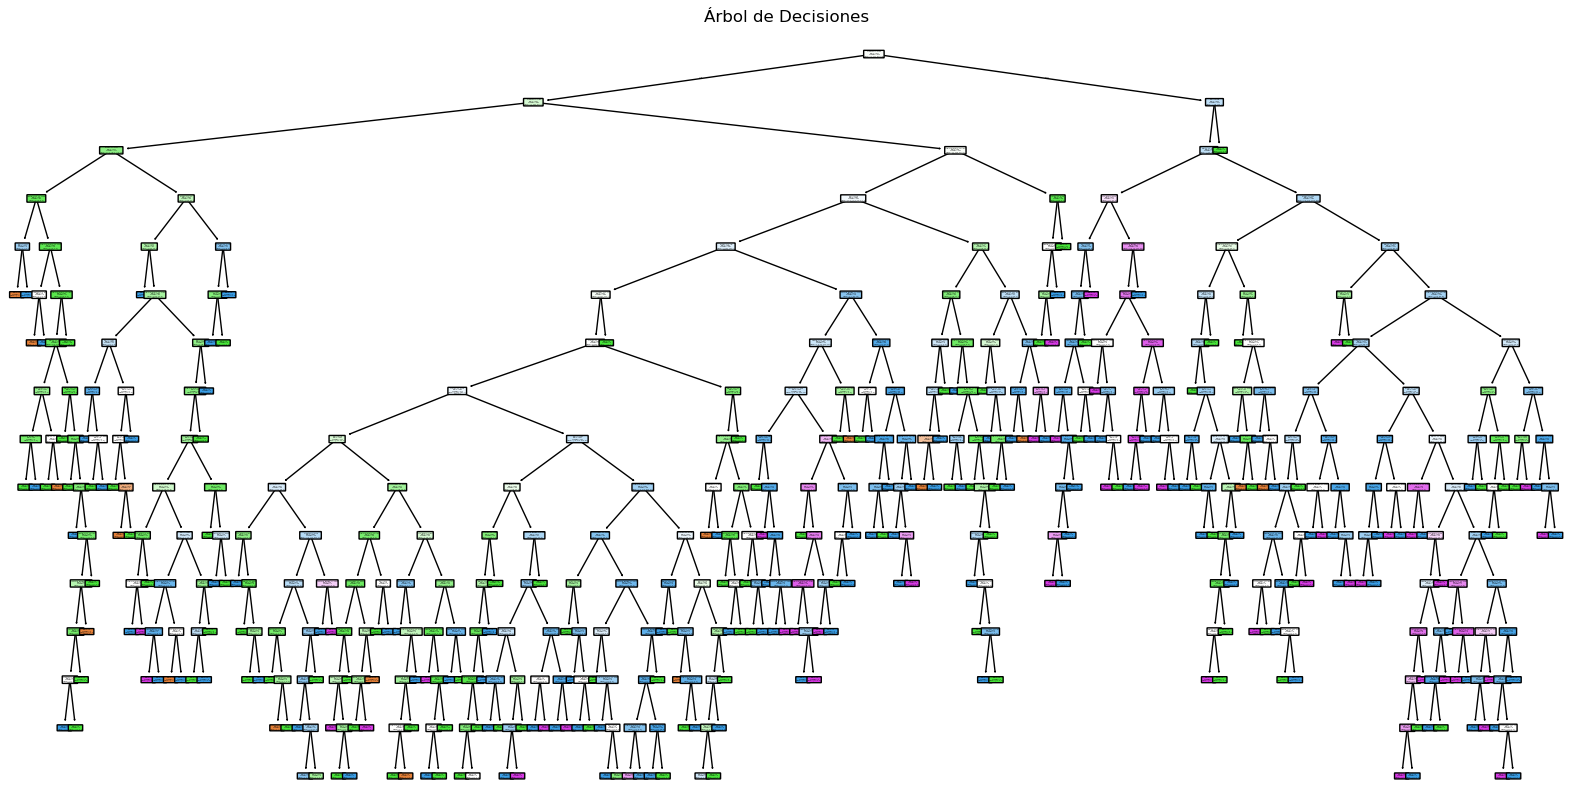

In [28]:
# Graficar el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(grid_search.best_estimator_, 
          feature_names=X.columns, 
          class_names=[str(cls) for cls in np.unique(y)], 
          filled=True, 
          rounded=True)
plt.title('Árbol de Decisiones')
plt.show()

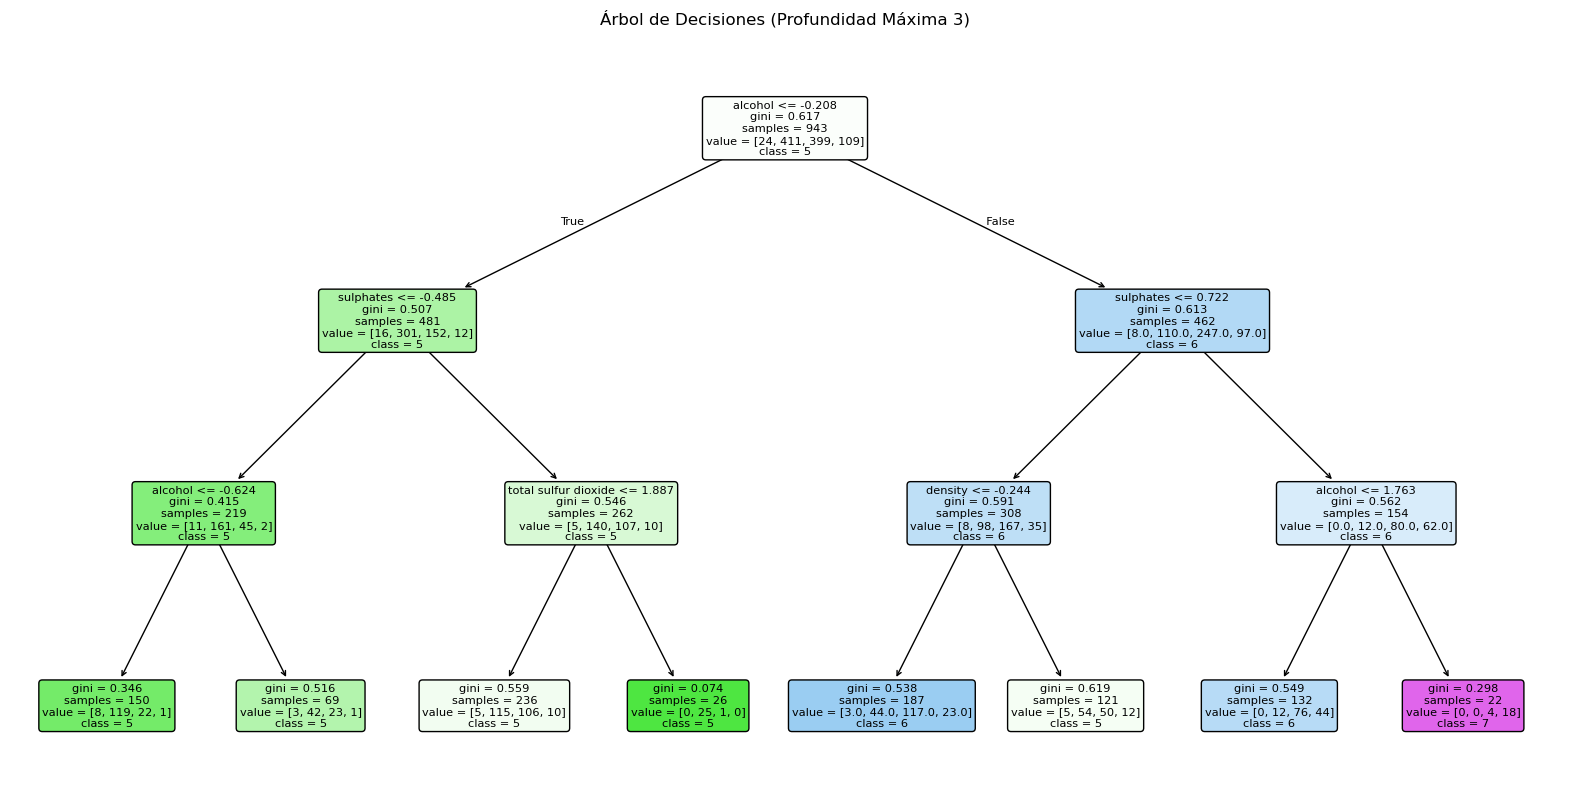

In [29]:
# Crear el modelo con una profundidad máxima
tree_model = DecisionTreeClassifier(max_depth=3)  # Limitar a 3 niveles
tree_model.fit(X_train, y_train)

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(y)], filled=True, rounded=True)
plt.title('Árbol de Decisiones (Profundidad Máxima 3)')
plt.show()

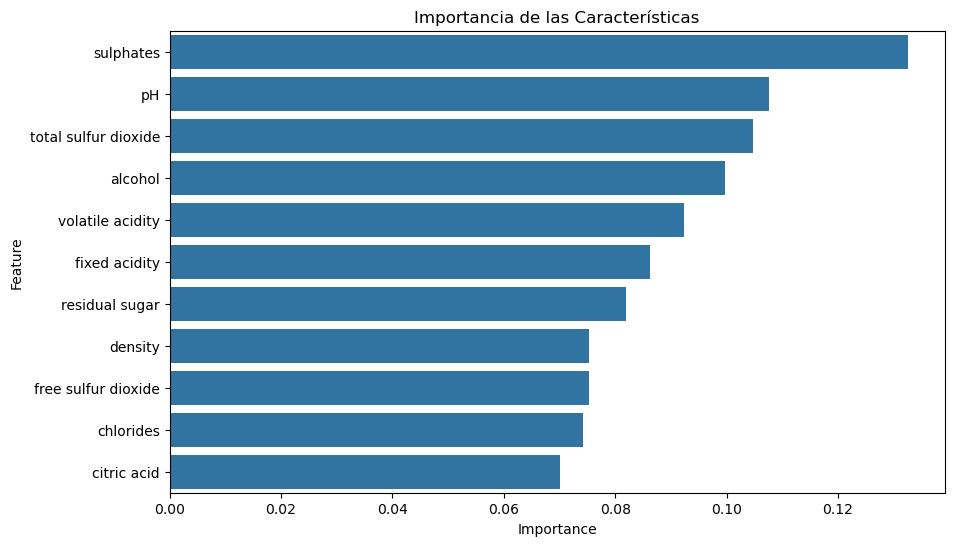

In [30]:
# Importancia de las características
importances = grid_search.best_estimator_.feature_importances_
features = X.columns

# Crear un DataFrame para la importancia
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características')
plt.show()